<a href="https://colab.research.google.com/github/juanepstein99/DI_Bootcamp/blob/main/Week8/MiniProyect/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mini-project 1 : Machine Learning for Mental Health**

Instructions :

Using the Mental Health dataset and what you have learn this week, answer the following questions :

* What is the distribution of mental health conditions among different age groups in the tech industry?

* How does the frequency of mental health issues vary by gender?
* Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.


**1. Introduction to the Dataset:**
* Download the dataset from Kaggle.
* Load the dataset using Pandas.
* Perform initial exploration to understand the dataset structure : whats the distribution of the data? What types of data do i have?

**2. Data Cleaning:**
* Identify and handle missing values.
* Detect and correct any inconsistencies in the data.
* Drop irrelevant columns if necessary.

/tmp/ipython-input-1000842212.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_treatment = df.groupby("Age_Group")["treatment"].value_counts().unstack()


Mental health treatment distribution by age group:
treatment   No  Yes
Age_Group          
18-25      108  102
26-35      360  341
36-45      124  153
46-55       18   24
56-70        5    8


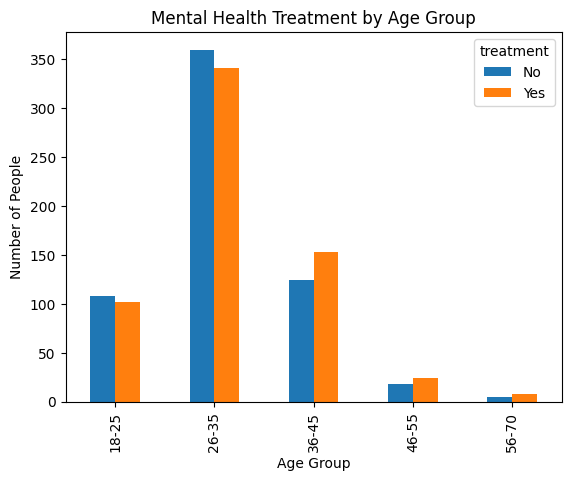


Mental health treatment distribution by gender:
treatment                                          No    Yes
Gender                                                      
agender                                           NaN    1.0
androgyne                                         NaN    1.0
cis female                                        NaN    1.0
cis male                                          1.0    2.0
cis man                                           NaN    1.0
cis-female/femme                                  NaN    1.0
enby                                              NaN    1.0
femail                                            1.0    NaN
femake                                            1.0    NaN
female                                           74.0  167.0
female (cis)                                      1.0    NaN
female (trans)                                    NaN    2.0
fluid                                             NaN    1.0
genderqueer                         

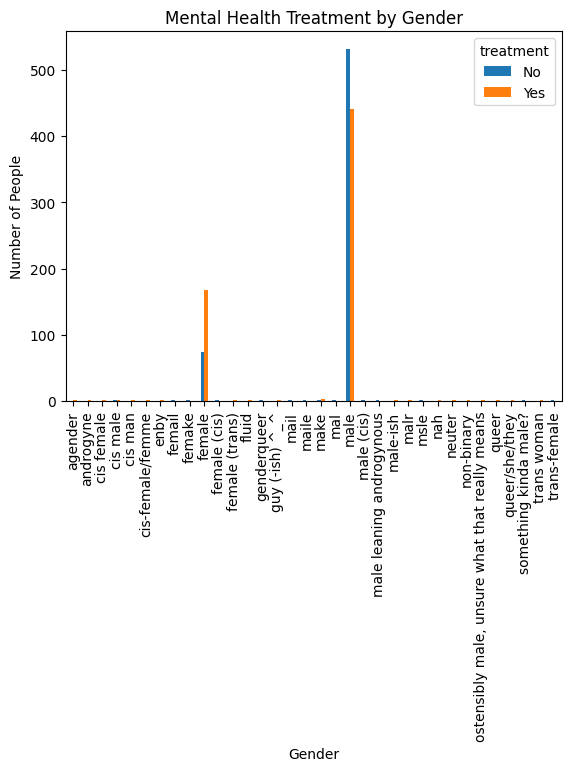


Country with lowest treatment rate:
Country
Austria                   0.0
Bosnia and Herzegovina    0.0
China                     0.0
Colombia                  0.0
Georgia                   0.0
Name: treatment, dtype: float64

Country with highest treatment rate:
Country
Japan       1.0
Croatia     1.0
Denmark     1.0
Moldova     1.0
Slovenia    1.0
Name: treatment, dtype: float64


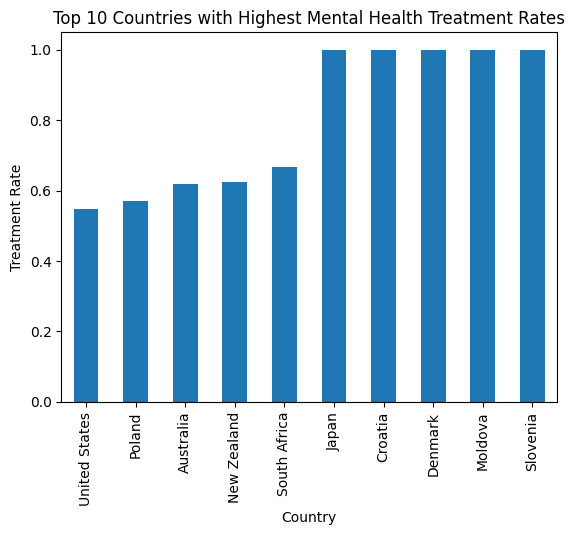

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey.csv")

# Data Cleaning

# Remove unrealistic ages (data errors)
df = df[(df["Age"] >= 18) & (df["Age"] <= 70)]

# Standardize gender values
df["Gender"] = df["Gender"].str.lower()

df["Gender"] = df["Gender"].replace({
    "m": "male",
    "male ": "male",
    "man": "male",
    "f": "female",
    "woman": "female",
    "female ": "female"
})

# Create age groups
bins = [18, 25, 35, 45, 55, 70]
labels = ["18-25", "26-35", "36-45", "46-55", "56-70"]

df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)


# Question 1:
# Distribution of mental health conditions by age group

age_treatment = df.groupby("Age_Group")["treatment"].value_counts().unstack()

print("Mental health treatment distribution by age group:")
print(age_treatment)

age_treatment.plot(kind="bar")
plt.title("Mental Health Treatment by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.show()


# Question 2:
# Frequency of mental health issues by gender

gender_treatment = df.groupby("Gender")["treatment"].value_counts().unstack()

print("\nMental health treatment distribution by gender:")
print(gender_treatment)

gender_treatment.plot(kind="bar")
plt.title("Mental Health Treatment by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.show()


# Question 3:
# Countries with highest and lowest mental health treatment rates

country_treatment_rate = df.groupby("Country")["treatment"].apply(
    lambda x: (x == "Yes").mean()
)

country_treatment_rate = country_treatment_rate.sort_values()

print("\nCountry with lowest treatment rate:")
print(country_treatment_rate.head(5))

print("\nCountry with highest treatment rate:")
print(country_treatment_rate.tail(5))

# Plot top 10 countries with highest rates
country_treatment_rate.tail(10).plot(kind="bar")

plt.title("Top 10 Countries with Highest Mental Health Treatment Rates")
plt.xlabel("Country")
plt.ylabel("Treatment Rate")
plt.show()
